# The Numpy Random Package

This notebook will discuss and demonstrate the [Numpy Random](https://numpy.org/doc/stable/reference/random/generator.html) package.  This is submission for the Programming for Data Analysis module in GMIT.  

The Numpy Random package is a subpackage of [Numpy](https://numpy.org/doc/stable/) package.

***
<br>

### Importing Packages and setting plot parameters
Before proceeding with the four tasks for this assignment I will import the relevant packages that I will need.  I will also set parameters for the plots. 

#### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick
from  numpy.random import Generator, PCG64, MT19937

***
<br>

#### Plot Parameters

In [2]:
# Creating my own style rather than using a set style.  [29]
plt.rcParams['figure.figsize'] = [6, 6]  # Figure size. 
plt.rcParams['axes.titlesize'] = 24  # Figure title size.
plt.rcParams['axes.labelsize']= 20  # Axis label size.
plt.rcParams['xtick.labelsize'] = 12 # x tick size.
plt.rcParams['ytick.labelsize'] = 12 # y tick size.

plt.rcParams['patch.force_edgecolor'] = True  # Setting an edge on the patches, black by default. 

plt.rcParams['axes.facecolor'] = '#f5f2f2' # Axes background color to grey.

plt.rcParams['axes.spines.left'] = False  # Spine removed from 4 corners. 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False

plt.rcParams['axes.grid'] = True  # Setting a grid
plt.rcParams['axes.axisbelow'] =(True)  # Grid behind patches
plt.rcParams['grid.color'] = '#ffffff' # Grid colour is white.
plt.rcParams.update()  # Applying above to all plots in this workbook. 

***
<br>

## NumPy
Numerical Python or "Numpy" is a package in Python that is used for data manipulation on numerical data. Numpy preforms fast operations on arrays. Numpy is much more effecient at preforming numerical data manipulation on its arrays than python is on lists. As Numpy is deisgned specifically for numerical data manipulation, it uses pre-compiled code rather than longer/ less efficient general phython code i.e. looping, indexing, etc.. [1] 

## NumPy Random
Numpy Random is a subpackage of Numpy.  The main purpose of the random package is for creating simulation data that generated randomly depending on the function that is chosen.   

3 categories of functions in the Numpy Random package: 
1. Simple random data 
2. Permutations 
3. Distributions.  

The simple random data functions does exactly as the descriptive name suggests, it output random numbers based on simple algorithms.  Random numbers may be picked between a range without advanced statistical or probability interference. 

The permutations function shuffles arrays randomly with options to keep orginal data _in place_ or to amend original data arrays. 

The distributions functions apply advanced statistical and probability algorithms on the input data.  

Above all, the output of Numpy Random functions can then be used to make estimated decisons, for comparsion purposes or for testing our code. Outputs are often used with packages such as Pandas - for manipulation, Matplotlib - for visualisation, and Scikit-Learn - for further equiry and machne learning predictions. 

***
<br>

# Simple Random Data
## Random Integers
The integers function provides a random number(s) between the parameters the user provides.  The parameters  include low, high (exclusive) and size of the sample of random numbers (optional but default size is 1).  First we'll generate one random number to simulate a dice roll.

In [3]:
rng = np.random.default_rng()
rng.integers(1, 7) # 1 is low, 7 is high (exclusive) 6 is true high. 

4

<br>

### Array of Random Integers
We can also generate an array of randoms. Below we will generate lotto quick pick numbers. 

In [4]:
rng = np.random.default_rng()
rand_ints = rng.integers(1, 48, size= 6)  # high is exclusive so numbers are generated between 1 - 47. 
print (rand_ints)

[14 38 37 44 46 28]


<br>

If we wish generate our quickpick numbers for lotto,  lotto plus 1 and lotto plus 2, we can create 3 arrays each containing 6 numbers. 

In [5]:
lotto = rng.integers(1, 48, size= (3,6)) # return 3 arrays of 6 numbers. 
print (lotto)

[[ 7 32 10 12 14 40]
 [17 18  4 22 25 12]
 [46 26 21 39 29 12]]


<br>

### Progressive/ Regressive Random Arrays
We can set lower or higher limits for numbers in the array as the random generation proceeds. As the range between the low and high narrows, we get a gradual increase or decrease in the frequency of the random number. To do so we set the lower or higher limit bounds by an array as the parameter.[2] 

Below is an example of setting the lower bounds for an array of 10,000 numbers. This is done by iterating through the size of the random array. The low parameter will increase slightly after each random number is generated, narrowing the random number choice available. This ultimately leads to the array being top heavy.  We can see this illustrated on the below histogram.

In [6]:
low = []
high = 10001 # High is exclusive for array and range. 10,000 is the true size. 


for i in range(1, high):
    lower_limit = i * 0.99  # multiple the number in range by 0.99 to get progressive lower limits. 
    low.append(lower_limit)

progressive_10k = rng.integers([low], high, size=high-1) #size is high-1 because high is exclusive.

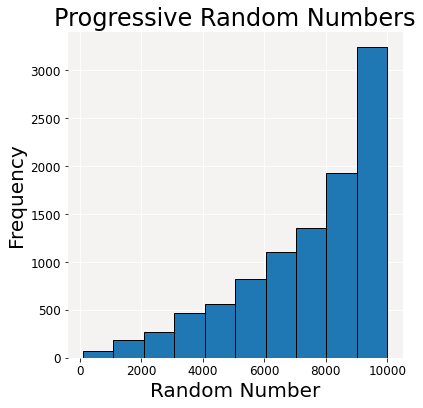

In [7]:
plt.hist(progressive_10k)
plt.title("Progressive Random Numbers")  # setting title 
plt.xlabel("Random Number")  
plt.ylabel("Frequency")
plt.show()

***
<br>

## Random Floats

The Random function in Numpy will provide floating point random numbers between 0 and 1(exclusive). As with random integers, random numbers are generated with a uniform distribion across the range.  Although parameters within the random function are limited. 

In [8]:
rand_flt = rng.random(10000)

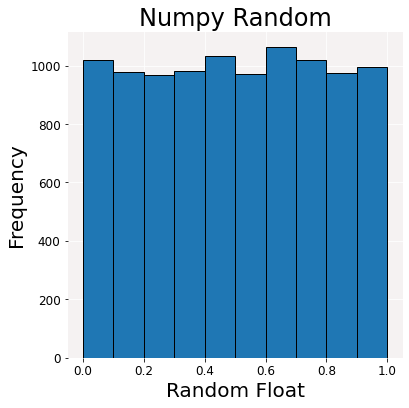

In [9]:
plt.hist(rand_flt)
plt.title('Numpy Random')
plt.xlabel("Random Float")  
plt.ylabel("Frequency")
plt.show()

***
<br>

## Choice

Random choice allows us to pick a random item(s) from an array or number(s) from a range.  We have the option to have that item returned to the pool to be potientally reselected for subsequent choices or not. Additionality we can set the probability of an item being selected. It's also worth noting that an array can contain a variety of data types, i.e ints, floats, strings, booleans, lists, etc.. [5][6]

Below I will demostrate a raffle where one contestant wins.  Although lets say we favour 11 and 32 over each other contestant.  Lets set their probilitity of winning higher than the rest and run the raffle 100 times.  I will then plot the frequency of each winner. 

In [10]:
player_profile = {} # [4] creating a dict to assign probabilities to specific contestants. 
players_no = []
probability =np.array([]) #[7]
winners = []
count = 0

while count < 100:  # running the function/ raffle 100 times. 
    for i in np.arange(100): # looping through players, setting probability.
        if i == 11:
            player_profile[i] = 0.25  # contestant 11 has 25% probability of being selected. 

        elif i == 32:
            player_profile[i] = 0.25   # contestant 32 has 25% probability of being selected.

        else: 
            player_profile[i] = 0.00757 # all other contestant each have 0.757% of being selected. 


    for keys in player_profile.keys(): # [8] iterating through the dict for players
        players_no.append(keys)  # appending the players to an array to be added to choice function. 


    for values in player_profile.values():  # need to create a numpy array before appending 
        probability = np.append(probability, values)  # as we'll need to sum these below. 


    probability /= probability.sum() #[3] - Need to sum and divide by itself as probability would not add to 1. 


    winner = rng.choice(players_no, p = probability) # choice between players with probabilities set. 
    winners.append(winner)
    count +=1


<br>

#### Getting the each players total number of wins.

In [11]:
# Converting data to dataframe. 
winners = pd.DataFrame(winners)

# Renaming column
winners.columns = ["Winners"]

# Indexing by columns and counting unique values.
win_no = winners["Winners"].value_counts()

<br>

#### Outputting total player wins in 100 games

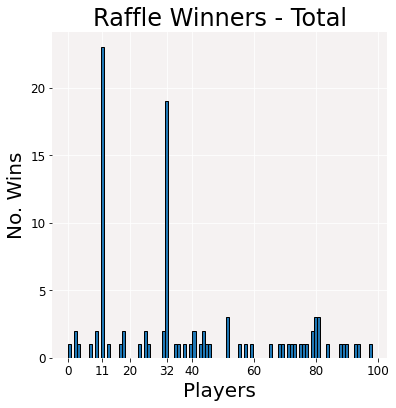


Player 11 won 23% of the time. 
Player 32 won 19% of the time


In [12]:
# creating histogram
plt.hist(winners, bins = 100)

# Setting title, and x, y axis.
plt.title('Raffle Winners - Total')
plt.xlabel("Players") 
plt.ylabel("No. Wins")

# Showing major ticks and 11 and 32. 
plt.xticks([0,11,20,32,40,60,80,100])
plt.show()

# Pring 11 and 32 wins as a percentage of total wins. 
print("\nPlayer 11 won {}% of the time. \nPlayer 32 won {}% of the time".format(win_no[11], win_no[32]))

***
<br>

# Permutations
## Shuffle & Permute

Shuffling mixes the contents of a range, array or another mutable sequence.  We can shuffle a list and output the results in an array or in multi dimensional arrays.  This will shuffle the contents of the original data. 

Permute is similar however the original data is not suffled. Rather a copy of the original data is made which is shuffled. [9]

Below we will create two 5-aside soccer teams.  Individuals are picked at random from a selection of 10 and placed into 2 seperate teams.

In [13]:
players = np.arange(10) # Creating a numpy array with numbers ranging from 0 to 9. 
rng.shuffle(players) # Shuffling the players up. 

teams = players.reshape((2, 5)) # Placing the random numbers into 2 arrays each containing 5 numbers.
rng.shuffle(teams) # Shuffling the order of the arrays.  Team A will kick off.  

Team_A = teams[0]
Team_B = teams[1]

print("Team A contains players: {}. You will kick off.".format(Team_A))
print("Team B contains players: {}".format(Team_B))



Team A contains players: [2 9 6 3 4]. You will kick off.
Team B contains players: [7 8 5 0 1]


***
<br>

# Distributions
In the project I will discuss the use of 5 of the distributions functions under the Numpy Random package availble in the documentation **[here](https://numpy.org/doc/stable/reference/random/generator.html#distributions)**.

## Normal

The Normal Distribution function takes in a mean number and returns a random number in close proximedty based on the stardard diveation provided.  The parameters are the **loc** (also known as the mean), the **scale** (also known as the standard deviation) and the **size** of the sample to be outputted.[13]  Documentation is availble **[here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)**.

If a large enough size is outputted, we can see a bell shaped curve when the set is plotted on a histogram.  This shows that the frequency of numbers is highest around the mean and then they begin to drop to zero either side of the mean. 

<br>

#### Male height data set

I obtained a dataset of 252 males height that was originally published in a journal in 1985. "Generalized Body Composition Prediction Equation for Men Using Simple Measurement Techniques" by K. Penrose, A. Nelson, A.G. Fisher in Medicine and Science in Sports and Exercise 17(2) (1985) 189.   


The dataset is available **[here](http://www.statistics4u.com/fundstat_eng/data_bodyfat.html)**.


Below I intend to plot the height of each sample and compare this sample agaist a random sample of normally distributed numbers. Important to note that 1 outlier was removed from the dataset which was 29.50 inches.  The mean for the remaining 251 height measurements was 70.3 inches. 


The average adult male height in the USA is 69.1 inches.[11] This is used for the normal distribution model below.  

The standard deviation for males height is about 2.2 inches. [10]

In [14]:
# Reading in the CSV file.[12]
height = pd.read_csv(r"data\252_male_height.csv")

In [15]:
# Creating a numpy array of normally distributed data. 
# 69.1 as mean, 2.2 as standard deviation & Same sample size as realworld dataset. 
normal = rng.normal (69.1, 2.2, 251)

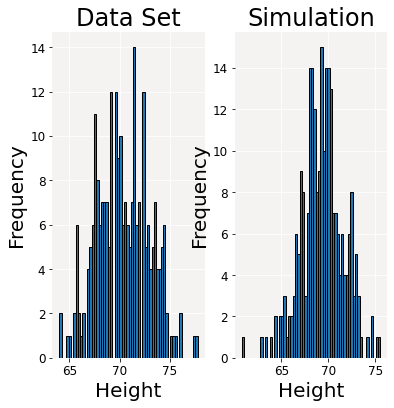

In [16]:
# Plotting both sets of data next to eachother as a histogram. 
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(height, bins = 60)
ax1.set_title("Data Set")
ax1.set_xlabel("Height")
ax1.set_ylabel("Frequency")

ax2.hist(normal, bins=60 )
ax2.set_title("Simulation")
ax2.set_xlabel("Height")
ax2.set_ylabel("Frequency")
plt.show()

#### Summary data

In [17]:
# Running summary data for realworld dataset. 
height_sum = height.describe()

In [18]:
# Storing the random stimulated data in a dataframe and labelling. 
normal_df = pd.DataFrame(normal)
normal_df.columns =['Simulation Data']

In [19]:
# Running summary data for the stimulated data. 
normal_sum= normal_df.describe()

In [20]:
height_sum.join(normal_sum)

,Height,Simulation Data
count,251.000000,251.000000
mean,70.310757,69.281160
std,2.614296,2.247107
min,64.000000,60.802149
25%,68.250000,68.044686
50%,70.000000,69.263653
75%,72.250000,70.565067
max,77.750000,75.524418


We can see that the normal distribution simulation data provided by numpy random is very similar to the real world dataset published by K. Penrose, A. Nelson, A.G. Fisher. 

***
<br>

## Poisson

Event occuring in a period of time. Output will be a simulation of the number of events that will occur another time thereafter.  Size is optional, we may chose to run its any amount of times. [15][16]

For instances, the event might be the number of car accidents a person is in during their lifetime.  We may run this for the population of a town. 

Average of 4 car accidents per person in their lifetime. Town population is 45,000

In [21]:
accident = rng.poisson(4,45000) 

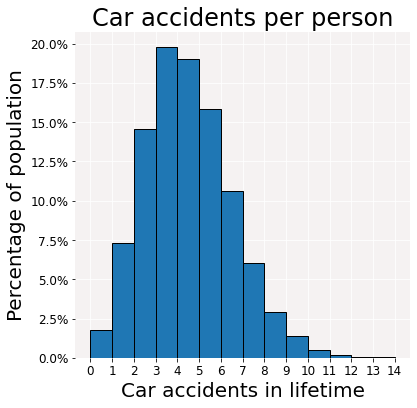

In [48]:
# Creating a sub plot for this plot to have more control over y axies tick (%)
fig, ax1 = plt.subplots()

ax1.hist(accident, density = True, bins = range(15))  # Setting bins to same range as x ticks, so they are in line. 
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))  # formating y axis to % [30].
ax1.set_title('Car accidents per person')
ax1.set_xlabel("Car accidents in lifetime")
ax1.set_ylabel("Percentage of population")
plt.xticks(range(15))  # x ticks set same as bins.
plt.show()

##### Percentage of accidents per person

In [23]:
# Converting accidents array to dataframe
df = pd.DataFrame(accident)
df.columns = ["data"]

In [24]:
# Getting frequency of number of accidents per person in percentage. [14]
per = (df['data'].value_counts()/df['data'].count())*100
per.round(1)

3     19.8
4     19.0
5     15.9
2     14.6
6     10.6
1      7.3
7      6.0
8      2.9
0      1.7
9      1.4
10     0.5
11     0.2
12     0.1
13     0.0
14     0.0
Name: data, dtype: float64

In [25]:
accidents_10 = (per.loc[10]/100*45000).round(1)

In [26]:
print("{} people in the town will be in 10 car accidents over their lifetime".format(accidents_10))

232.0 people in the town will be in 10 car accidents over their lifetime


***
<br>

## Uniform

Uniform distribution will generate random float numbers between the range the user provides.  Numbers are evenly spread across the sample range.  When the size of the sample is large enough, we can see an even distribution of numbers on a plot. [17]

Below I will generate a 10000 float sample between the range of 0 and 100 before plotting the random uniform data.

In [27]:
# Parameters are low, high (exclusive), and size of the sample.  I have rounded the numbers to 3 decimal places.
uniform = (rng.uniform(0,100,100000)).round(3)

<br>

### Uniform Plot

When we plot the same data, we can see an even spread of numbers between 0 and 100. 

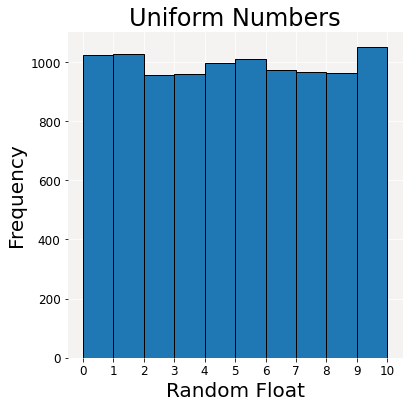

In [28]:
plt.hist(uniform, bins = (range(11))) # bins set to allign with x axis ticks. 
plt.title('Uniform Numbers')
plt.xlabel("Random Float")
plt.ylabel("Frequency")
plt.xticks(range(11))
plt.show()

<br>

### Generating summary data for the uniform sample. 

The average of the sample should be the mid-point of the range, i.e. low + high / 2.  

I anticipate that the mean will be circa 50.00

In [29]:
# Concerting the Numpy array to dataframe and naming the column.
uni_df = pd.DataFrame(uniform)
uni_df.columns = ["Uniform Data"]

In [30]:
summary = uni_df.describe().round(3)

In [31]:
# Indexing the summary data to get the mean as the variable "mean".
mean = summary["Uniform Data"].loc["mean"]

In [32]:
print("\nThe mean of the uniform sample is {}, we anticipated 50. \n\nSee the full summary below\n".format(mean))
summary


The mean of the uniform sample is 50.125, we anticipated 50. 

See the full summary below



,Uniform Data
count,100000.000
mean,50.125
std,28.877
min,0.001
25%,25.166
50%,50.011
75%,75.226
max,100.000


This even distribution of numbers is also seen with large samples in the random integers function. However, as integers have no decimal place there is gaps between numbers and therefore some might argue that its not uniformly distributed. 

The uniform distribution returns floating point numbers, thus the random sample can return numbers such as 1.99, 2.01, 2.05, etc.. 
These are truly evenly distributed numbers.  This function is excellent for creating noise in our data sets and plots. 

***
<br>

## Weibull 

The Weibull function stimulates the life expectancy of a product. Once plotted the x axis give the "time-to-failure" of a product, although time doesn't necceserily mean hours or minutes. It can also mean miles, cycles etc.. [26]

The parameter include **_shape_** and **_size_** of the sample.  [27]

Shape aka the slope is the failure behaviour.  If the shape is less than one, products will fail almost immediately, and the fail rate decreased with time. 

If the shape is greater than one the failure rate will increase with time, before reaching a peak and decreasing with time, i.e. more durable products will not fail immediately. They have a longer life expectancy but will fail sometime. 

<br>

#### Disposable items
We can think of disposable items as having a shape of less than one.  The product life is complete after one use.  An example is paper bag.  We might think of this item as having a shape of 0.75.  Most often a bag will tear slightly on the way home from the supermarket, however some might not. An individal might decide to reuse the paper bag again.  This product life is demonstrated below. 

<br>

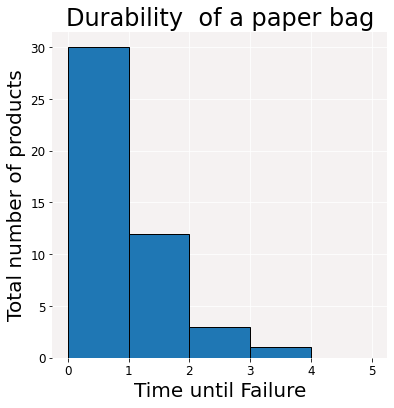

In [33]:
# setting shape as 0.75 and sample size as 50. 
wei_paper = rng.weibull(.5, 50)
plt.hist(wei_paper, bins=(range(6)))
plt.title("Durability  of a paper bag")
plt.xticks(range(6))
plt.xlabel("Time until Failure")
plt.ylabel("Total number of products")
plt.show()

#### Durable Items - iPhone

We can see below that items intended to last have a delayed failure rate.  However, its lear that their is a mean age that the items fails at.  The failure rate is progressive until it hits a peak, before the failure rate begins to drop to zero.  It is interesting to note that the failure rate begins immediately. No product will be guarenteed to work and others will begin to fail immediately. 

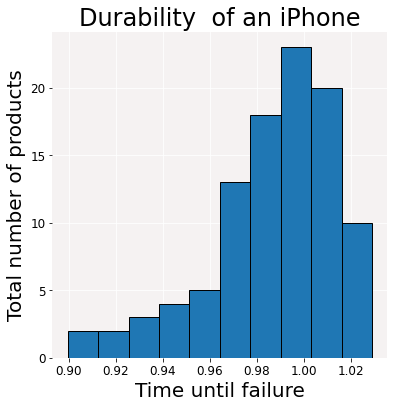

In [34]:
# setting shape as 10 and sample size as 100. 
wei_iphone = rng.weibull(50, 100)
plt.hist(wei_iphone)
plt.title("Durability  of an iPhone")
plt.xlabel("Time until failure")
plt.ylabel("Total number of products")
plt.show()

***

<br>

## Binomial 

Biomial distribution function provides the results of a particular outcome based on the probabily the user provides. Success of the outcome is outputted. 

The parameters are the number of trial, the probability of success, and the sample size (optional). 


<br>

#### 1 coin flip

I will demonstrate the result of getting heads based on one coin flip we would use the function below.  1 coin flip, and 0.5 is the probability. 

- 1 being success (heads).
- 0 being fail (tails). 

In [35]:
rng.binomial(1, 0.5)

1

<br>

#### Best out of 3

Now lets say we are playing best out of 3. The number provided is the amount of coin flips we won.  We need a number of 2 or 3 to win.

In [36]:
rng.binomial(3, 0.5)

1

<br>

#### 100 games, best out of 3

Lets simulate 100 games, all of which are best out of 3. We are heads each time.

I will illistrate the results of a pie plot below.

In [37]:
coins = rng.binomial(3, 0.5, 100)
print (coins)

[1 0 1 1 1 2 2 2 1 2 1 2 1 2 1 2 3 1 0 2 2 2 2 2 1 1 3 1 2 1 1 1 1 1 2 1 1
 2 0 2 2 1 0 2 3 3 2 0 1 1 1 1 2 1 1 2 3 0 1 2 2 2 3 3 2 2 2 1 2 1 3 1 3 2
 1 3 2 2 2 1 2 0 2 1 1 1 1 3 2 0 0 2 0 3 2 2 3 2 2 1]


In [38]:
# if we win 2 or more in each round, we are the winner. The result will be appended to the array coins_results.
coins_result = []

for i in coins:
    if i > 1:
        i = "won"
        coins_result.append(i)
    else:
        i = "lost"
        coins_result.append(i)
        

In [39]:
# Counting how many games we won and lost. 
result =[]
result.append(coins_result.count("lost"))
result.append(coins_result.count("won"))

In [40]:
# Setting the specs for the pie chart.
labels = "Lost","Won"
explode = (0, 0.1)

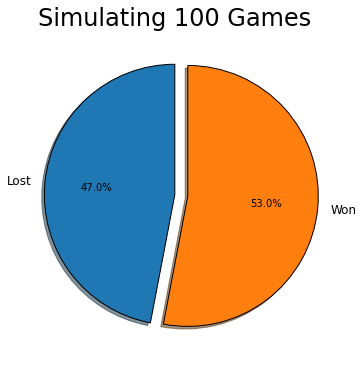

In [41]:
# Plotting the results of the 100 simulations. [28]
fig1, ax1 = plt.subplots()

ax1.pie(result, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        explode=explode)
plt.title("Simulating 100 Games")
plt.show()

## consider a bar of pie with win break down,  show how many I won with 2 and how many with 3. 

***
<br>

## Pseudorandom Number Generators & Seeds

Random numbers generated on Numpy seem to be random however they are not truly random. Random numbers in Numpy are generated with a pseudorandom number generator (PRNG). A PRNG is a deterministic algorithm, i.e. an input is processed through an algorithm to form an output. The random number(s) are reproducable if we know PRNG and the seed.[18]  

<br>

The seed is the initial number fed into the PRNG. By default the seed will be generated from the current time in the computer when the code is ran [20]. The subsequent seed for the next random sample depends on the PRNG used.  A sequence of random numbers may therefore repeat itself when the a same input is fed back into the algorithm.  The sequence before this repetition is called the period. 

<br>

The default PRNG used in Numpy is now PCG64, recently changed from Mersenne Twister.  PCG64 is said to be superior in many ways.  Mersenne Twister is slower than PCG64 as code is much longer. PCG64 is said to be twice as fast [24].  Further, the memory it uses is much larger than PCG64.  Mersenne Twister is also said to have failed statistical quality tests [21].  PCG64 is said to have greater statistical reliability [22]. Its claimed that Mersenne Twister does not handle zeros well [21][23]


<br>

#### Setting the seed for PCG64 as the PRNG

We can set the seed by setting the stream source of the BitGenerator.  This done by calling the Generator function in Numpy and setting the bitGenerator to PCG64, and applying the initial seed.[19]  Below I will generate 2 sets of random data.  The parameters will be identical. 

In [42]:
# Setting the seed to 999 and producing random uniform numbers.
seed_test1 = Generator(PCG64(999)).uniform(0,20,10)
print (seed_test1)

[15.57650035  3.44497262 14.27145587 15.00670156  3.42218154 18.03849122
  2.83563084 12.22457409 18.21886239  3.81546545]


In [43]:
# Re-running the above random uniform number generator. 
seed_test2 = Generator(PCG64(999)).uniform(0,20,10)
print (seed_test2)

[15.57650035  3.44497262 14.27145587 15.00670156  3.42218154 18.03849122
  2.83563084 12.22457409 18.21886239  3.81546545]


<br>

#### Checking to see if the random numbers were reproduced

I will run a function to see if the contents of both arrays are equal

In [44]:
# Checking to see if the contents of both arrays are the same. [25]
if (seed_test1==seed_test2).all():
    print ("\nThe seed has been set. The random numbers were reproduced.")
    
else:
    print ("\nRandom numbers were not reproduced.")


The seed has been set. The random numbers were reproduced.



<br>

#### Using Mersenne Twister as the PRNG 

In [45]:
# Setting the seed for the function.
MT_test1 = Generator(PCG64(999)).integers(0,20,10)
print (MT_test1)

[16 15  3  3  3 14  2 15  3  3]


In [46]:
MT_test2 = Generator(PCG64(999)).integers(0,20,10)
print (MT_test2)

[16 15  3  3  3 14  2 15  3  3]


<br>

#### Checking to see if the random numbers were reproduced

In [47]:
# Checking to see ig the contents of both arrays are the same. 
if (MT_test1==MT_test2).all():
    print ("\nThe seed has been set. The random numbers were reproduced.")
    
else:
    print ("\nRandom numbers were not reproduced.")


The seed has been set. The random numbers were reproduced.


<br>

# References 
- [1]  https://numpy.org/doc/stable/user/whatisnumpy.html
- [2]  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers
- [3]  https://newbedev.com/np-random-choice-probabilities-do-not-sum-to-1
- [4]  https://stackoverflow.com/questions/3679694/a-weighted-version-of-random-choice
- [5]  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
- [6]  https://www.sharpsightlabs.com/blog/numpy-random-choice/#numpy-random-choice-syntax
- [7]  https://numpy.org/doc/stable/user/basics.creation.html
- [8]  https://realpython.com/iterate-through-dictionary-python/#iterating-through-values
- [9]  https://newbedev.com/shuffle-vs-permute-numpy
- [10] https://www.nber.org/system/files/working_papers/h0108/h0108.pdf
- [11] https://www.healthline.com/health/average-height-for-men#_noHeaderPrefixedContent
- [12] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- [13] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal
- [14] https://stackoverflow.com/questions/50558458/pandas-get-frequency-of-item-occurrences-in-a-column-as-percentage
- [15] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson
- [16] https://www.investopedia.com/terms/p/poisson-distribution.asp
- [17] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform
- [18] https://towardsdatascience.com/random-numbers-in-numpy-89172d6eac16
- [19] https://numpy.org/doc/stable/reference/random/new-or-different.html
- [20] https://realpython.com/python-random/#prngs-in-python
- [21] https://arxiv.org/pdf/1910.06437.pdf
- [22] https://www.pcg-random.org/
- [23] https://numpy.org/doc/stable/reference/random/parallel.html
- [24] https://www.pcg-random.org/rng-performance.html
- [25] https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise
- [26] https://www.weibull.com/hotwire/issue14/relbasics14.htm
- [27] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.weibull.html#numpy.random.Generator.weibull
- [28] https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
- [29] https://matplotlib.org/stable/tutorials/introductory/customizing.html#composing-styles
- [30] https://stackoverflow.com/questions/31357611/format-y-axis-as-percent

***
# End